# Data Preprocessing

In [2]:
import keras
from keras.datasets import mnist
from keras.layers import Dense
from keras.models import Sequential
from matplotlib import pyplot as plt
from random import randint
from PIL import Image
import os
import numpy as np
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
#from nolearn.dbn import DBN
import timeit
import seaborn as sn
import itertools 
from sklearn import svm
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.neural_network import MLPClassifier


Using TensorFlow backend.


In [4]:
# ref:  https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    #for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
     #   plt.text(j, i, format(cm[i, j], fmt),
      #           horizontalalignment="center",
       #          color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()



In [29]:

# Loading training and testing data, validation data to be made during training.

(x_train, y_train), (x_test, y_test) = mnist.load_data()

print('Before flattening lets check out how the data looks')
print('type of x_train: ',type(x_train))
print('x_train: ',x_train)
print('y_train: ',y_train)
print('shape of x_train: ',x_train.shape)
print('shape of y_train: ',y_train.shape)

print('shape of x_test: ',x_test.shape)
print('shape of y_test: ',y_test.shape)


image_size = 784 # 28 x 28
x_train = x_train.reshape(x_train.shape[0], image_size) 
x_test = x_test.reshape(x_test.shape[0], image_size)

# Converting class vectors to binary class matrices
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

print('\n\n----------After flattening-----------\n\n')
print('type of x_train: ',type(x_train))
print('x_train: ',x_train)
print('y_train: ',y_train)
print('shape of x_train: ',x_train.shape)
print('shape of y_train: ',y_train.shape)

print('shape of x_test: ',x_test.shape)
print('shape of y_test: ',y_test.shape)

# ref: https://medium.freecodecamp.org/how-to-classify-mnist-digits-with-different-neural-network-architectures-39c75a0f03e3


Before flattening lets check out how the data looks
type of x_train:  <class 'numpy.ndarray'>
x_train:  [[[0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  ..., 
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]]

 [[0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  ..., 
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]]

 [[0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  ..., 
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]]

 ..., 
 [[0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  ..., 
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]]

 [[0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  ..., 
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]]

 [[0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  ..., 
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]]]
y_train:  [5 0 4 ..., 5 6 8]
shape of x_train:  (60000, 28, 28)
shape of 

# Multilayer Perceptron Neural Network

In [4]:
model = Sequential()


# We need to specify the input shape of the input layer so that it matches the shape of our training data.
#model.add(Dense(units=2048, activation='sigmoid', input_shape=(image_size,)))
model.add(Dense(units=1024, activation='relu', input_shape=(image_size,)))
model.add(Dense(units=512, activation='sigmoid', input_shape=(image_size,)))
model.add(Dense(units=128, activation='relu', input_shape=(image_size,)))

model.add(Dense(units=num_classes, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1024)              803840    
_________________________________________________________________
dense_2 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 1,395,594
Trainable params: 1,395,594
Non-trainable params: 0
_________________________________________________________________


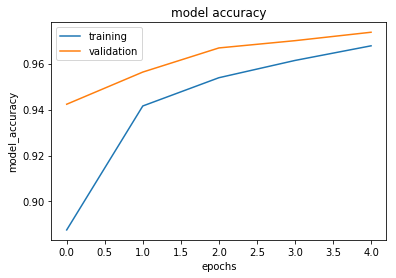

Test loss: 0.1104
Test accuracy: 0.966


In [26]:
model.compile(optimizer="sgd", loss='categorical_crossentropy', metrics=['accuracy'])
m_fit = model.fit(x_train, y_train, batch_size=32, epochs=5,verbose=False, validation_split=.1)
loss, accuracy  = model.evaluate(x_test, y_test, verbose=False)

plt.plot(m_fit.history['acc'])
plt.plot(m_fit.history['val_acc'])
plt.title('model accuracy')
plt.xlabel('epochs')
plt.ylabel('model_accuracy')
plt.legend(['training', 'validation'], loc='best')
plt.show()

print(f'Test loss: {loss:.4}')
print(f'Test accuracy: {accuracy:.4}')

In [39]:
# Loading training and testing data for confusion matrix
(x_train, y_train), (x_test, y_test) = mnist.load_data()
image_size = 784 # 28 x 28
x_train = x_train.reshape(x_train.shape[0], image_size) 
x_test = x_test.reshape(x_test.shape[0], image_size)


In [46]:
nn_y_pred = model.predict(x_test)

In [3]:

#ref:  https://jovianlin.io/keras-one-hot-encode-decode-sequence-data/
#decoded_nn_y_test = []
def decode(datum):
    return np.argmax(datum)



decoded_nn_mnist_y_pred = []

for i in range(nn_y_pred.shape[0]):
    datum = nn_y_pred[i]
    decoded_datum = decode(nn_y_pred[i])
    decoded_nn_mnist_y_pred.append(decoded_datum)


In [4]:
decoded_nn_mnist_y_pred = np.array(decoded_nn_mnist_y_pred)

In [ ]:
#run this cell to get the confusion matrix. I already obtained it from another cell. 
#This cell has been made to maintain a order of sequence.

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, decoded_nn_mnist_y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes= [0,1,2,3,4,5,6,7,8,9] )

plt.show()

Confusion matrix, without normalization
[[ 972    0    1    2    0    1    2    1    1    0]
 [   0 1120    2    1    0    1    3    1    7    0]
 [  11    4  987    4    1    3    4    5   12    1]
 [   2    0    9  954    0   23    0    6   11    5]
 [   1    0    4    0  947    0    9    1    4   16]
 [   4    1    0    8    2  863    6    1    4    3]
 [  12    3    0    0    5    9  926    0    3    0]
 [   1    7   10    2    1    0    0  995    2   10]
 [   6    2    1    4    6   10    5    4  930    6]
 [   3    4    1    5   15    3    1    5    6  966]]


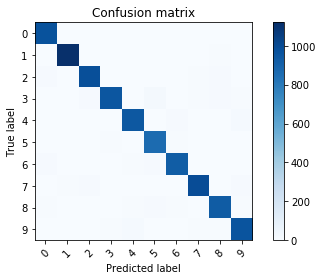

In [45]:

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, nn_y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes= [0,1,2,3,4,5,6,7,8,9] )

 #Plot normalized confusion matrix
#plt.figure()
#plot_confusion_matrix(cnf_matrix, classes= [0,1,2,3,4,5,6,7,8,9], normalize=True,
 #                     title='Normalized confusion matrix')

plt.show()

In [40]:
USPSMat  = []
USPSTar  = []
curPath  = r'C:\Users\riskh\CSE474\Project3\USPSdata\USPSdata\Numerals'
savedImg = []

for j in range(0,10):
    curFolderPath = curPath + '\\' + str(j) 
    imgs =  os.listdir(curFolderPath)
    for img in imgs:
        curImg = curFolderPath + '\\' + img
        if curImg[-3:] == 'png':
            img = Image.open(curImg,'r')
            img = img.resize((28, 28))
            savedImg = img
            imgdata = (255-np.array(img.getdata()))/255
            USPSMat.append(imgdata)
            USPSTar.append(j)

In [41]:
USPSMat = np.array(USPSMat)
USPSTar = np.array(USPSTar)

In [42]:
print(USPSMat.shape)
print(USPSTar.shape)

(19999, 784)
(19999,)


In [33]:
USPSTar = keras.utils.to_categorical(USPSTar, num_classes)

In [34]:
print(USPSMat.shape)
print(USPSTar.shape)

(19999, 784)
(19999, 10)


In [136]:
USloss, USaccuracy  = model.evaluate(USPSMat, USPSTar, verbose=False)


In [137]:
print('Loss is USPS dataset: ',USloss)
print('Accuracy in prediction in USPS dataset: ',USaccuracy)

Loss is USPS dataset:  2.3685310526
Accuracy in prediction in USPS dataset:  0.218810940547


In [138]:
nn_us_y_pred = model.predict(USPSMat)

In [139]:
nn_us_y_pred.shape

(19999, 10)

In [144]:
nn_us_y_pred[1]

array([ 0.03,  0.14,  0.11,  0.02,  0.05,  0.46,  0.01,  0.13,  0.01,  0.04], dtype=float32)

In [143]:
USPSTar[1]

array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.], dtype=float32)

In [145]:
#ref:  https://jovianlin.io/keras-one-hot-encode-decode-sequence-data/
decoded_USPSTar = []
def decode(datum):
    return np.argmax(datum)

for i in range(USPSTar.shape[0]):
    datum = USPSTar[i]
    decoded_datum = decode(USPSTar[i])
    decoded_USPSTar.append(decoded_datum)

In [146]:
decoded_nn_us_y_pred = []

for i in range(nn_us_y_pred.shape[0]):
    datum = nn_us_y_pred[i]
    decoded_datum = decode(nn_us_y_pred[i])
    decoded_nn_us_y_pred.append(decoded_datum)

In [149]:
decoded_USPSTar = np.array(decoded_USPSTar)
decoded_nn_us_y_pred = np.array(decoded_nn_us_y_pred)

In [150]:
decoded_USPSTar.shape

(19999,)

In [151]:
decoded_nn_us_y_pred.shape

(19999,)

In [153]:
type(decoded_USPSTar[1])

numpy.int64

In [154]:
type(decoded_nn_us_y_pred[1])

numpy.int64

Confusion matrix, without normalization
[[ 125  769  591    0   12  400    0   40    0   63]
 [   0 1737  131    0    0   62    0   70    0    0]
 [   0 1000  879    0    0  119    0    1    0    0]
 [   0 1251  172   46    0  525    0    6    0    0]
 [   2 1518   97    0   98  189    0   91    0    5]
 [   0  546   91    0    1 1359    0    3    0    0]
 [   4 1322  276    0    3  390    1    4    0    0]
 [   0 1645  117    0    0  117    0  121    0    0]
 [   1 1300   90    0    0  598    0   11    0    0]
 [   0 1555  146    2    1  129    0  157    0   10]]


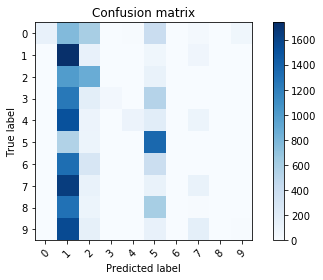

In [155]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(decoded_USPSTar, decoded_nn_us_y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix

plot_confusion_matrix(cnf_matrix, classes= [0,1,2,3,4,5,6,7,8,9] )

plt.show()

# Preprocessing data for SVM and Random Forest

In [12]:
# Loading training and testing data, validation data to be made during training.
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print('--------------PreProcessing of MNIST Data---------------')
print('Before flattening lets check out how the data looks')
print('type of x_train: ',type(x_train))
#print('x_train: ',x_train)
#print('y_train: ',y_train)
print('shape of x_train: ',x_train.shape)
print('shape of y_train: ',y_train.shape)

print('shape of x_test: ',x_test.shape)
print('shape of y_test: ',y_test.shape)


image_size = 784 # 28 x 28
x_train = x_train.reshape(x_train.shape[0], image_size) 
x_test = x_test.reshape(x_test.shape[0], image_size)

# Converting class vectors to binary class matrices

num_classes = 10
#y_train = keras.utils.to_categorical(y_train, num_classes)
#y_test = keras.utils.to_categorical(y_test, num_classes)

print('\n\n----------After flattening-----------\n\n')
print('type of x_train: ',type(x_train))
#print('x_train: ',x_train)
#print('y_train: ',y_train)
print('shape of x_train: ',x_train.shape)
print('shape of y_train: ',y_train.shape)

print('shape of x_test: ',x_test.shape)
print('shape of y_test: ',y_test.shape)


--------------PreProcessing of MNIST Data---------------
Before flattening lets check out how the data looks
type of x_train:  <class 'numpy.ndarray'>
shape of x_train:  (60000, 28, 28)
shape of y_train:  (60000,)
shape of x_test:  (10000, 28, 28)
shape of y_test:  (10000,)


----------After flattening-----------


type of x_train:  <class 'numpy.ndarray'>
shape of x_train:  (60000, 784)
shape of y_train:  (60000,)
shape of x_test:  (10000, 784)
shape of y_test:  (10000,)


In [27]:
USPSMat  = []
USPSTar  = []
curPath  = r'C:\Users\riskh\CSE474\Project3\USPSdata\USPSdata\Numerals'
savedImg = []

for j in range(0,10):
    curFolderPath = curPath + '\\' + str(j) 
    imgs =  os.listdir(curFolderPath)
    for img in imgs:
        curImg = curFolderPath + '\\' + img
        if curImg[-3:] == 'png':
            img = Image.open(curImg,'r')
            img = img.resize((28, 28))
            savedImg = img
            imgdata = (255-np.array(img.getdata()))/255
            USPSMat.append(imgdata)
            USPSTar.append(j)
            
USPSMat = np.array(USPSMat)
USPSTar = np.array(USPSTar)
print('-----After Preprocessing of USPS Data--------')
print("Shape of Test(USPSMat):",USPSMat.shape)
print("Shape of Target(USPSTar):",USPSTar.shape)

-----After Preprocessing of USPS Data--------
Shape of Test(USPSMat): (19999, 784)
Shape of Target(USPSTar): (19999,)


# Support Vector Machine

In [158]:
svm_model = LinearSVC()
svm_model.fit(x_train, y_train)
svm_y_pred = svm_model.predict(x_test)
mnist_svm_acc = accuracy_score(y_test, svm_y_pred)
print ("Linear SVM accuracy for MNIST data: ",mnist_svm_acc)

Linear SVM accuracy for MNIST data:  0.8538


C:\Users\riskh\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [159]:
svm_us_y_pred = svm_model.predict(USPSMat)
usps_svm_acc = accuracy_score(USPSTar, svm_us_y_pred)
print ("Linear SVM accuracy for USPS data: ",usps_svm_acc)

Linear SVM accuracy for USPS data:  0.123756187809


Confusion matrix, without normalization
[[ 928    0    3    3    5    8   11    4   16    2]
 [   0 1077    2    2    0    0    4    2   47    1]
 [   6    7  749   47   37    4   13   13  154    2]
 [   6    2   18  853    8   13    4   13   84    9]
 [   1    1    6    0  921    0    3    2   18   30]
 [  12    4    3   50   35  581   18   18  150   21]
 [   8    3    6    1   27   15  843    1   54    0]
 [   0    4    9    6   19    0    1  877   21   91]
 [  10    6    4   20   21   12    6    5  872   18]
 [   3   12    1    7   86    2    0   22   39  837]]


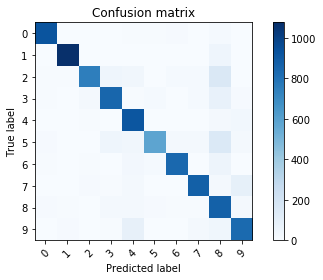

In [160]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, svm_y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes= [0,1,2,3,4,5,6,7,8,9] )

 #Plot normalized confusion matrix
#plt.figure()
#plot_confusion_matrix(cnf_matrix, classes= [0,1,2,3,4,5,6,7,8,9], normalize=True,
 #                     title='Normalized confusion matrix')

plt.show()

Confusion matrix, without normalization
[[  20   51    0    0    0 1414    0  515    0    0]
 [   0  404    0    0    0 1570    0   26    0    0]
 [   5  228    0    0    0 1730    0   36    0    0]
 [   5  167    0    0    0 1787    0   41    0    0]
 [   3  189    0    0    6 1534    0  268    0    0]
 [   3  144    0    0    0 1755    0   98    0    0]
 [   3   94    0    0    1 1820    3   79    0    0]
 [   3  340    0    0    0 1370    0  287    0    0]
 [   0   96    0    0    1 1694    0  209    0    0]
 [   4  240    0    0    2 1233    0  521    0    0]]


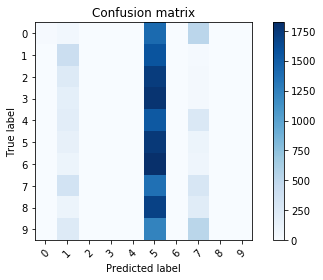

In [161]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(USPSTar, svm_us_y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
#plt.figure()
plot_confusion_matrix(cnf_matrix, classes= [0,1,2,3,4,5,6,7,8,9] )

 #Plot normalized confusion matrix
#plt.figure()
#plot_confusion_matrix(cnf_matrix, classes= [0,1,2,3,4,5,6,7,8,9], normalize=True,
 #                     title='Normalized confusion matrix')

plt.show()

In [17]:
gamma_svm_model = svm.SVC(gamma=1)
gamma_svm_model.fit(x_train,y_train)
gamma_svm_y_pred = gamma_svm_model.predict(x_test)
mnist_gamma_svm_acc = accuracy_score(y_test, gamma_svm_y_pred)
print ("SVM(Gamma = 1) accuracy for MNIST data: ",mnist_gamma_svm_acc)

SVM(Gamma = 1) accuracy for MNIST data: 0.1135


In [18]:
gamma_svm_us_y_pred = gamma_svm_model.predict(USPSMat)
gamma_usps_svm_acc = accuracy_score(USPSTar, gamma_svm_us_y_pred)
print ("SVM(Gamma = 1) accuracy for USPS data: ",gamma_usps_svm_acc)

SVM(Gamma = 1) accuracy for USPS data: 0.10000500025


In [19]:
gamma_svm_y_pred_train = gamma_svm_model.predict(x_train)
mnist_gamma_svm_acc_train = accuracy_score(y_train, gamma_svm_y_pred_train)

In [20]:
print ("SVM(Gamma = 1) validation accuracy for MNIST Train data: ",mnist_gamma_svm_acc_train )

SVM(Gamma = 1) validation accuracy for MNIST Train data: 1.0


In [ ]:
#Run the following three cells to observe the confusion matrix when gamma=1. 
#I used the same cell to get the confusion matrix and took a snap of the confusion matrix for my report.
# Compute confusion matrix
print('\nConfusion Matrix of MNIST Train data(Gamma = 1)\n')
cnf_matrix = confusion_matrix(y_train, gamma_svm_y_pred_train)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes= [0,1,2,3,4,5,6,7,8,9] )


plt.show()

In [ ]:
# Compute confusion matrix
print('\nConfusion Matrix of MNIST Test data(Gamma = 1)\n')
cnf_matrix = confusion_matrix(y_test, gamma_svm_y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes= [0,1,2,3,4,5,6,7,8,9] )


plt.show()

In [ ]:
# Compute confusion matrix
print('\nConfusion Matrix of USPS Test data(Gamma = 1)\n')
cnf_matrix = confusion_matrix(USPSTar, gamma_svm_us_y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes= [0,1,2,3,4,5,6,7,8,9] )


plt.show()

In [21]:
ngamma_svm_model = svm.SVC()
ngamma_svm_model.fit(x_train,y_train)
ngamma_svm_y_pred = ngamma_svm_model.predict(x_test)
mnist_ngamma_svm_acc = accuracy_score(y_test, ngamma_svm_y_pred)
print ("SVM(Gamma = default) accuracy for MNIST data: ",mnist_ngamma_svm_acc)

SVM(Gamma = default) accuracy for MNIST data: 0.1135


In [22]:
ngamma_svm_us_y_pred = ngamma_svm_model.predict(USPSMat)
ngamma_usps_svm_acc = accuracy_score(USPSTar, ngamma_svm_us_y_pred)
print ("SVM accuracy for USPS data: ",ngamma_usps_svm_acc)

SVM accuracy for USPS data: 0.10000500025


In [23]:
ngamma_svm_y_pred_train = ngamma_svm_model.predict(x_train)
mnist_ngamma_svm_acc_train = accuracy_score(y_train, ngamma_svm_y_pred_train)

In [24]:
print ("SVM(Gamma = default) validation accuracy for MNIST Train data: ",mnist_gamma_svm_acc_train )

SVM(Gamma = default) validation accuracy for MNIST Train data: 1.0


# Random Forest

In [8]:
rf_model = RandomForestClassifier(n_jobs=-1, n_estimators=2000)
rf_model.fit(x_train, y_train)
rf_y_pred = rf_model.predict(x_test)
mnist_rf_acc = accuracy_score(y_test, rf_y_pred)
print ("Random forest accuracy on MNIST data: ",mnist_rf_acc)

Random forest accuracy on MNIST data:  0.9719


Confusion matrix, without normalization
[[ 970    0    0    0    0    2    2    1    4    1]
 [   0 1124    2    3    0    2    2    0    1    1]
 [   6    0  999    6    3    0    4    8    6    0]
 [   0    0    9  976    0    5    0    9    9    2]
 [   1    0    1    0  958    0    5    0    2   15]
 [   3    0    0   11    3  862    6    2    4    1]
 [   7    3    0    0    2    3  940    0    3    0]
 [   1    2   18    1    1    0    0  992    1   12]
 [   4    0    6    7    2    5    3    4  934    9]
 [   5    5    2    9   10    3    1    5    5  964]]


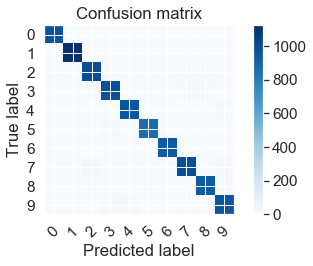

In [55]:

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, rf_y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes= [0,1,2,3,4,5,6,7,8,9] )

 #Plot normalized confusion matrix
#plt.figure()
#plot_confusion_matrix(cnf_matrix, classes= [0,1,2,3,4,5,6,7,8,9], normalize=True,
 #                     title='Normalized confusion matrix')

plt.show()

In [51]:
US_rf_y_pred = rf_model.predict(USPSMat)
US_rf_acc = accuracy_score(USPSTar, US_rf_y_pred)
print ("random forest accuracy on USPS data: ",US_rf_acc)

random forest accuracy on USPS data:  0.111105555278


Confusion matrix, without normalization
[[   0   53    0    0   18   83    0 1846    0    0]
 [   0  544    0    0    0   29    0 1427    0    0]
 [   0  248    1    0    1   71    0 1678    0    0]
 [   0   35    0    0    6  166    0 1793    0    0]
 [   0  146    0    0   15   44    0 1795    0    0]
 [   0  104    0    0    5  259    0 1632    0    0]
 [   0   98    0    0    1  210    0 1691    0    0]
 [   0  564    0    0    0   33    0 1403    0    0]
 [   0  136    0    0    6  550    0 1308    0    0]
 [   0  283    0    0    5   59    0 1653    0    0]]


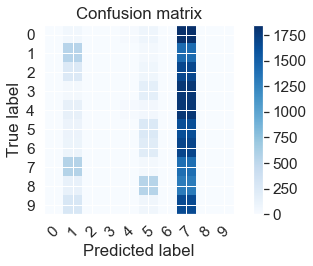

In [56]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(USPSTar, US_rf_y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
#plt.figure()
plot_confusion_matrix(cnf_matrix, classes= [0,1,2,3,4,5,6,7,8,9] )

 #Plot normalized confusion matrix
#plt.figure()
#plot_confusion_matrix(cnf_matrix, classes= [0,1,2,3,4,5,6,7,8,9], normalize=True,
 #                     title='Normalized confusion matrix')

plt.show()

In [6]:
rf_model = RandomForestClassifier(n_jobs=-1, n_estimators=10)
rf_model.fit(x_train, y_train)
rf_y_pred = rf_model.predict(x_test)
mnist_rf_acc = accuracy_score(y_test, rf_y_pred)
print ("Random forest accuracy on MNIST data: ",mnist_rf_acc)

Random forest accuracy on MNIST data:  0.9458


In [7]:
US_rf_y_pred = rf_model.predict(USPSMat)
US_rf_acc = accuracy_score(USPSTar, US_rf_y_pred)
print ("random forest accuracy on USPS data: ",US_rf_acc)

random forest accuracy on USPS data:  0.101955097755


Confusion matrix, without normalization
[[ 968    1    1    0    0    3    4    1    2    0]
 [   0 1120    4    4    0    2    3    0    2    0]
 [   8    2  970    9    7    4    5   13   11    3]
 [   5    2   27  936    1   16    0    8   12    3]
 [   3    2    8    1  935    1    6    2    5   19]
 [   7    3    4   36    4  814    9    1    7    7]
 [  12    3    3    2    4   10  918    0    6    0]
 [   3    5   22    2    3    1    0  976    4   12]
 [   6    0   17   21    9    9    6    3  891   12]
 [   7    4    5   13   23    4    1    9   13  930]]


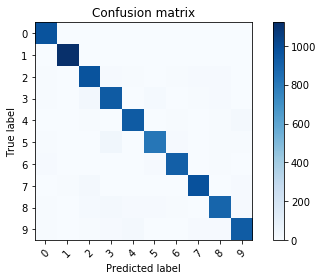

In [9]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, rf_y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes= [0,1,2,3,4,5,6,7,8,9] )

 #Plot normalized confusion matrix
#plt.figure()
#plot_confusion_matrix(cnf_matrix, classes= [0,1,2,3,4,5,6,7,8,9], normalize=True,
 #                     title='Normalized confusion matrix')

plt.show()

Confusion matrix, without normalization
[[  62  340   34  145   33  139    0 1247    0    0]
 [  11  643   41   24    2    5    0 1272    0    2]
 [  49  714   41  201    6   32    0  952    4    0]
 [  23  572   68  177   18   70    0 1072    0    0]
 [   6  422   66   70   28   25    0 1382    1    0]
 [  17  400   40  239    1   93    0 1206    3    1]
 [  37  352   87  352   14   79    2 1073    1    3]
 [  17  845   60   84    1    9    0  984    0    0]
 [  40  457  111  319   19  188    0  856    8    2]
 [  14  547   38   89   11   38    0 1261    1    1]]


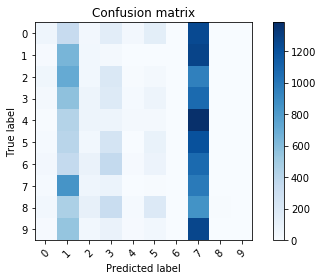

In [10]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(USPSTar, US_rf_y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
#plt.figure()
plot_confusion_matrix(cnf_matrix, classes= [0,1,2,3,4,5,6,7,8,9] )

 #Plot normalized confusion matrix
#plt.figure()
#plot_confusion_matrix(cnf_matrix, classes= [0,1,2,3,4,5,6,7,8,9], normalize=True,
 #                     title='Normalized confusion matrix')

plt.show()

In [11]:
rf_model = RandomForestClassifier(n_jobs=-1, n_estimators=100)
rf_model.fit(x_train, y_train)
rf_y_pred = rf_model.predict(x_test)
mnist_rf_acc = accuracy_score(y_test, rf_y_pred)
print ("Random forest accuracy on MNIST data: ",mnist_rf_acc)

Random forest accuracy on MNIST data:  0.9692


In [12]:
US_rf_y_pred = rf_model.predict(USPSMat)
US_rf_acc = accuracy_score(USPSTar, US_rf_y_pred)
print ("random forest accuracy on USPS data: ",US_rf_acc)

random forest accuracy on USPS data:  0.115705785289


Confusion matrix, without normalization
[[ 971    0    2    0    0    2    2    1    2    0]
 [   0 1125    2    3    0    1    3    0    1    0]
 [   6    0  999    5    3    0    4    9    6    0]
 [   0    0   10  970    0    9    0   10    7    4]
 [   1    0    1    0  956    0    5    0    2   17]
 [   3    0    1   12    4  859    4    2    4    3]
 [   5    3    1    1    4    6  935    0    3    0]
 [   2    3   19    1    1    0    0  992    3    7]
 [   5    0    5    4    5    7    5    4  930    9]
 [   5    6    3   11   14    6    1    4    4  955]]


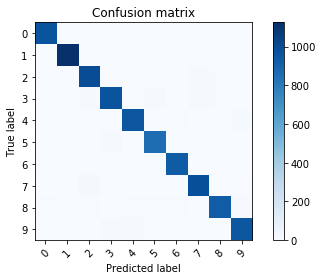

In [13]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, rf_y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes= [0,1,2,3,4,5,6,7,8,9] )

 #Plot normalized confusion matrix
#plt.figure()
#plot_confusion_matrix(cnf_matrix, classes= [0,1,2,3,4,5,6,7,8,9], normalize=True,
 #                     title='Normalized confusion matrix')

plt.show()

Confusion matrix, without normalization
[[   0   18    0    0   67   74    0 1841    0    0]
 [   0  252    0    0    2   31    0 1715    0    0]
 [   0   91    2    1   15   48    0 1842    0    0]
 [   0   33    0    8   34  104    0 1821    0    0]
 [   0   58    0    0   64   37    0 1841    0    0]
 [   0   54    0    0   11  258    0 1677    0    0]
 [   0   42    0    0   18  219    0 1721    0    0]
 [   0  233    0    0   12   25    0 1730    0    0]
 [   0   98    0    1   38  513    0 1350    0    0]
 [   0  106    0    0   25   48    0 1821    0    0]]


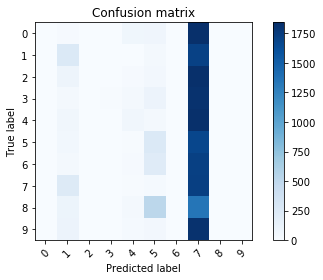

In [14]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(USPSTar, US_rf_y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
#plt.figure()
plot_confusion_matrix(cnf_matrix, classes= [0,1,2,3,4,5,6,7,8,9] )

 #Plot normalized confusion matrix
#plt.figure()
#plot_confusion_matrix(cnf_matrix, classes= [0,1,2,3,4,5,6,7,8,9], normalize=True,
 #                     title='Normalized confusion matrix')

plt.show()

In [15]:
rf_model = RandomForestClassifier(n_jobs=1, n_estimators=100)
rf_model.fit(x_train, y_train)
rf_y_pred = rf_model.predict(x_test)
mnist_rf_acc = accuracy_score(y_test, rf_y_pred)
print ("Random forest accuracy on MNIST data: ",mnist_rf_acc)

Random forest accuracy on MNIST data:  0.9697


In [16]:
US_rf_y_pred = rf_model.predict(USPSMat)
US_rf_acc = accuracy_score(USPSTar, US_rf_y_pred)
print ("random forest accuracy on USPS data: ",US_rf_acc)

random forest accuracy on USPS data:  0.115705785289


Confusion matrix, without normalization
[[ 971    0    0    0    0    3    3    1    2    0]
 [   0 1120    3    3    0    2    3    1    3    0]
 [   6    0  999    3    3    1    4   10    6    0]
 [   0    0   10  971    0    8    0    9    9    3]
 [   1    0    2    0  954    0    4    1    2   18]
 [   3    0    0   13    3  862    4    1    4    2]
 [   6    3    1    0    3    4  939    0    2    0]
 [   1    3   23    2    0    0    0  986    3   10]
 [   4    0    7    5    5    4    3    4  934    8]
 [   7    5    2   12    9    1    1    5    6  961]]


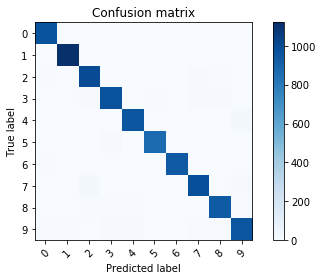

In [17]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, rf_y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes= [0,1,2,3,4,5,6,7,8,9] )

 #Plot normalized confusion matrix
#plt.figure()
#plot_confusion_matrix(cnf_matrix, classes= [0,1,2,3,4,5,6,7,8,9], normalize=True,
 #                     title='Normalized confusion matrix')

plt.show()

Confusion matrix, without normalization
[[   0   41    0    0   22  271    0 1666    0    0]
 [   0  308    0    0    2   80    0 1610    0    0]
 [   0  133    0    0    2  229    0 1635    0    0]
 [   0   14    0    0   14  412    0 1560    0    0]
 [   0   47    0    0   49  112    0 1792    0    0]
 [   0   50    0    0    3  544    0 1403    0    0]
 [   0   32    0    0   15  428    0 1525    0    0]
 [   0  370    0    0    4  213    0 1413    0    0]
 [   0   58    0    0   23  861    0 1058    0    0]
 [   0  159    0    0    9  186    0 1646    0    0]]


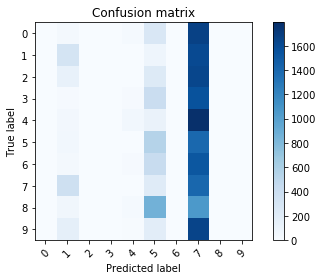

In [18]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(USPSTar, US_rf_y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
#plt.figure()
plot_confusion_matrix(cnf_matrix, classes= [0,1,2,3,4,5,6,7,8,9] )

 #Plot normalized confusion matrix
#plt.figure()
#plot_confusion_matrix(cnf_matrix, classes= [0,1,2,3,4,5,6,7,8,9], normalize=True,
 #                     title='Normalized confusion matrix')

plt.show()

In [27]:
rf_model = RandomForestClassifier(n_jobs=1, n_estimators=100, max_leaf_nodes= 1000)
rf_model.fit(x_train, y_train)
rf_y_pred = rf_model.predict(x_test)
mnist_rf_acc = accuracy_score(y_test, rf_y_pred)
print ("Random forest accuracy on MNIST data: ",mnist_rf_acc)

Random forest accuracy on MNIST data:  0.9582


In [28]:
US_rf_y_pred = rf_model.predict(USPSMat)
US_rf_acc = accuracy_score(USPSTar, US_rf_y_pred)
print ("random forest accuracy on USPS data: ",US_rf_acc)

random forest accuracy on USPS data:  0.115055752788


Confusion matrix, without normalization
[[ 971    0    0    0    0    3    3    1    2    0]
 [   0 1120    3    3    0    2    3    1    3    0]
 [   6    0  999    3    3    1    4   10    6    0]
 [   0    0   10  971    0    8    0    9    9    3]
 [   1    0    2    0  954    0    4    1    2   18]
 [   3    0    0   13    3  862    4    1    4    2]
 [   6    3    1    0    3    4  939    0    2    0]
 [   1    3   23    2    0    0    0  986    3   10]
 [   4    0    7    5    5    4    3    4  934    8]
 [   7    5    2   12    9    1    1    5    6  961]]


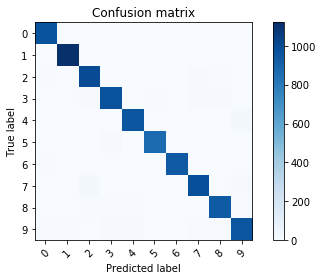

In [19]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, rf_y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes= [0,1,2,3,4,5,6,7,8,9] )

 #Plot normalized confusion matrix
#plt.figure()
#plot_confusion_matrix(cnf_matrix, classes= [0,1,2,3,4,5,6,7,8,9], normalize=True,
 #                     title='Normalized confusion matrix')

plt.show()

Confusion matrix, without normalization
[[   0   41    0    0   22  271    0 1666    0    0]
 [   0  308    0    0    2   80    0 1610    0    0]
 [   0  133    0    0    2  229    0 1635    0    0]
 [   0   14    0    0   14  412    0 1560    0    0]
 [   0   47    0    0   49  112    0 1792    0    0]
 [   0   50    0    0    3  544    0 1403    0    0]
 [   0   32    0    0   15  428    0 1525    0    0]
 [   0  370    0    0    4  213    0 1413    0    0]
 [   0   58    0    0   23  861    0 1058    0    0]
 [   0  159    0    0    9  186    0 1646    0    0]]


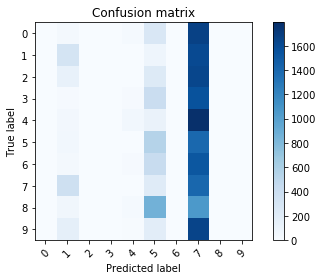

In [20]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(USPSTar, US_rf_y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
#plt.figure()
plot_confusion_matrix(cnf_matrix, classes= [0,1,2,3,4,5,6,7,8,9] )

 #Plot normalized confusion matrix
#plt.figure()
#plot_confusion_matrix(cnf_matrix, classes= [0,1,2,3,4,5,6,7,8,9], normalize=True,
 #                     title='Normalized confusion matrix')

plt.show()

# Logistic Regression

In [11]:
#reference:  https://medium.com/@martinpella/logistic-regression-from-scratch-in-python-124c5636b8ac
            #https://medium.com/@aerinykim/how-to-implement-the-softmax-derivative-independently-from-any-loss-function-ae6d44363a9d
class LogisticRegression:
    def __init__(self, lr=0.01, num_iter=100000, fit_intercept=True, verbose=False):
        self.lr = lr
        self.num_iter = num_iter
        self.fit_intercept = fit_intercept
        self.verbose = verbose
    
    def __add_intercept(self, X):
        intercept = np.ones((X.shape[0], 1))
        return np.concatenate((intercept, X), axis=1)
    
    def __sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def __softmax(self, x):
        """Compute softmax values for each sets of scores in x."""
        e_x = np.exp(x - np.max(x))
        return e_x / e_x.sum(axis=0) # only difference
    
    
    def softmax_grad(self,s): 
    # Take the derivative of softmax element w.r.t the each logit which is usually Wi * X
    # input s is softmax value of the original input x. 
    # s.shape = (1, n) 
    # i.e. s = np.array([0.3, 0.7]), x = np.array([0, 1])

    # initialize the 2-D jacobian matrix.
        jacobian_m = np.diag(s)

        for i in range(len(jacobian_m)):
            for j in range(len(jacobian_m)):
                if i == j:
                    jacobian_m[i][j] = s[i] * (1-s[i])
                else: 
                    jacobian_m[i][j] = -s[i]*s[j]
        return jacobian_m
    
    #def softmax(self,z):
     #   z -= np.max(z)
      #  sm = (np.exp(z).T / np.sum(np.exp(z), axis=0)).T
       # return sm
    
    def __loss(self, h, y):
        return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
    
    def fit(self, X, y):
        
        
        # weights initialization
        self.theta = np.zeros(X.shape[0])
        
        for i in range(self.num_iter):
            z = np.dot(X.T, self.theta)
            #h = self.__sigmoid(z)
            h = self.__softmax(z)
            gradient = np.dot(X, (h - y))
           
            gradient = gradient / y.size
            #gradient = self.softmax_grad(h)
            self.theta -= self.lr * gradient
            
            #print(self.theta)
            if(self.verbose == True and i % 10000 == 0):
                z = np.dot(X, self.theta)
                h = self.__sigmoid(z)
                print(f'loss: {self.__loss(h, y)} \t')
    
    def predict_prob(self, X):
        
    
        #return self.__sigmoid(np.dot(X.T, self.theta))
        return self.__softmax(np.dot(X.T, self.theta))
    def predict(self, X,threshold = 0.1):
        return self.predict_prob(X)

In [12]:
lg_model = LogisticRegression(lr=0.01, num_iter=50)

X = x_train.T
y = y_train

print('X shape: ',X.shape)
print('y shape: ',y.shape)
lg_model.fit(X,y)

print('x_test.T shape: ',(x_test.T).shape)
print('USPSMat.t shape: ',(USPSMat.T).shape)
preds_mnist = lg_model.predict(x_test.T)
preds_usps = lg_model.predict(USPSMat.T)

print('preds_mnist.shape: ',preds_mnist.shape)
print('preds_usps.shape: ', preds_usps.shape)

print('---------------------------------------')

print('ytest.shape: ',y_test.shape)
print('USPSTar.shape: ', USPSTar.shape)
print('--------LOGISTIC REGRESSION---------------')
print('--------MNIST DATA-----------------------')
print('prediction accuracy of MNIST set:'+ str(1-(preds_mnist == y_test).mean()))

print('prediction accuracy of USPS set:'+ str((preds_usps == USPSTar).mean()))

#https://stackoverflow.com/questions/24560298/python-numpy-valueerror-operands-could-not-be-broadcast-together-with-shapes

X shape:  (784, 60000)
y shape:  (60000,)
x_test.T shape:  (784, 10000)
USPSMat.t shape:  (784, 19999)
preds_mnist.shape:  (10000,)
preds_usps.shape:  (19999,)
---------------------------------------
ytest.shape:  (10000,)
USPSTar.shape:  (19999,)
--------LOGISTIC REGRESSION---------------
--------MNIST DATA-----------------------
prediction accuracy of MNIST set:0.902
prediction accuracy of USPS set:0.10000500025


Confusion matrix, without normalization
[[ 958    1    2    1    0    2    6    1    8    1]
 [   0 1114    3    3    0    2    4    1    8    0]
 [  13    5  902   19   12    6   26   26   16    7]
 [  11    1   18  894    2   19    2   24   23   16]
 [   4    2    0    1  835    1   27    2   19   91]
 [  30   18    2   76   17  688   19    9   17   16]
 [  26    4   14    0   21    6  880    0    7    0]
 [   4   13   33    5    6    0    0  920    8   39]
 [   9   14    8   36   12   15   19    6  823   32]
 [   8    7    3   15   33    9    4   14   13  903]]


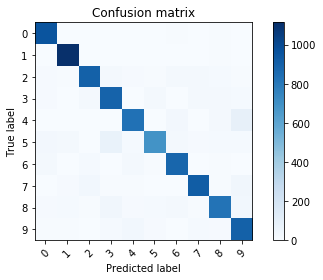

In [16]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, rf_y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes= [0,1,2,3,4,5,6,7,8,9] )


plt.show()

Confusion matrix, without normalization
[[2000    0    0    0    0    0    0    0    0    0]
 [2000    0    0    0    0    0    0    0    0    0]
 [1999    0    0    0    0    0    0    0    0    0]
 [1999    1    0    0    0    0    0    0    0    0]
 [2000    0    0    0    0    0    0    0    0    0]
 [2000    0    0    0    0    0    0    0    0    0]
 [2000    0    0    0    0    0    0    0    0    0]
 [2000    0    0    0    0    0    0    0    0    0]
 [2000    0    0    0    0    0    0    0    0    0]
 [2000    0    0    0    0    0    0    0    0    0]]


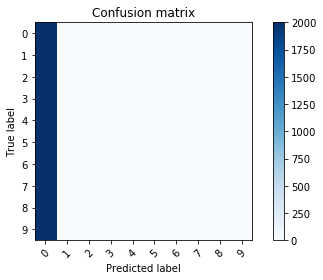

In [13]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(USPSTar, preds_usps)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
#plt.figure()
plot_confusion_matrix(cnf_matrix, classes= [0,1,2,3,4,5,6,7,8,9] )


plt.show()

# Ensemble Classifier (Majority Voting)

In [11]:
#https://machinelearningmastery.com/ensemble-machine-learning-algorithms-python-scikit-learn/
import pandas
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

X = x_train
Y = y_train
seed = 7
kfold = model_selection.KFold(n_splits=10, random_state=seed)
# creating the sub models
estimators = []
model1 = LogisticRegression()
estimators.append(('logistic', model1))
model2 = RandomForestClassifier()
estimators.append(('randomforest', model2))
model3 = LinearSVC()
estimators.append(('svm', model3))
model4 = MLPClassifier()
estimators.append(('neuralnet', model4))

# creating the ensemble model
ensemble = VotingClassifier(estimators)
results = model_selection.cross_val_score(ensemble, X, Y, cv=kfold)
print(results.mean())

C:\Users\riskh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\riskh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\riskh\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\riskh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\riskh\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, 

C:\Users\riskh\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\riskh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\riskh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\riskh\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\riskh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 i

0.923616666667


C:\Users\riskh\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [14]:
results_usps = model_selection.cross_val_score(ensemble, USPSMat, USPSTar, cv=kfold)
#print(results_usps.mean())

C:\Users\riskh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\riskh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\riskh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\riskh\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\riskh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be

C:\Users\riskh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.00045


C:\Users\riskh\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
